In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read Data
stf_data = pd.read_csv('../time series/data/StackOverflow.csv')

stf_data['month'] = pd.date_range(start='2009-01-31', end='2019-12-31', freq='M')
stf_data['month'] = pd.to_datetime(stf_data['month'], format = "%Y/%m/%d",  yearfirst=True)
stf_data = stf_data.set_index('month')
stf_data.head()

#stf_data.dtypes


,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,pandas,...,Plato,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
month,,,,,,,,,,,,,,,,,,,,,
2009-01-31,0,0,0,631,8,6,2,19,8,0,...,0,1,0,0,5,0,0,5,0,0
2009-02-28,1,0,0,633,9,7,3,27,4,0,...,0,0,0,0,5,0,0,11,0,0
2009-03-31,0,0,0,766,4,4,2,24,3,0,...,0,0,0,0,7,0,0,2,0,0
2009-04-30,0,0,0,768,12,6,3,32,10,0,...,0,0,0,0,11,0,0,5,0,0
2009-05-31,1,0,0,1003,2,7,2,42,7,0,...,0,0,0,0,10,0,0,3,0,0


In [3]:
# Select MATLAB
stf_matlab =stf_data["matlab"]
stf_matlab.head()

month
2009-01-31    19
2009-02-28    27
2009-03-31    24
2009-04-30    32
2009-05-31    42
Name: matlab, dtype: int64

In [4]:
# Plot Data
# Use Sktime style 
from sktime.utils.plotting import plot_series

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot:ylabel='matlab'>)

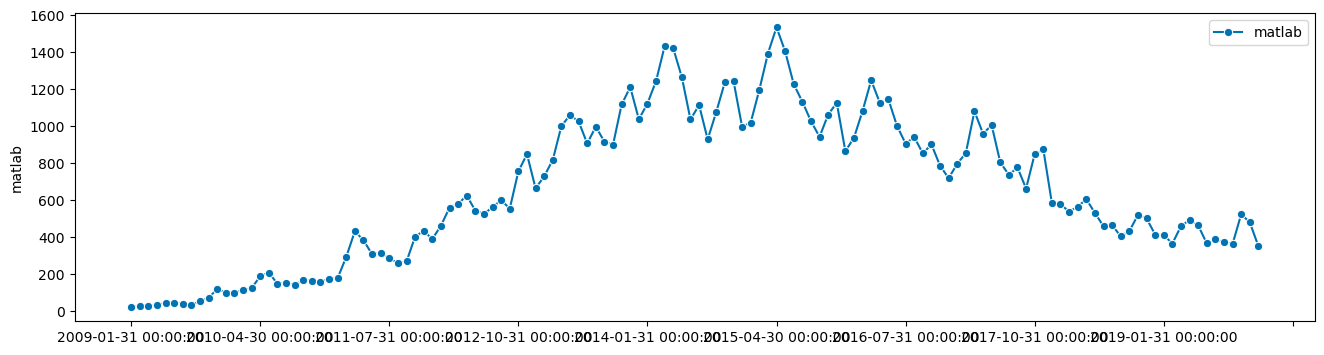

In [5]:
# Plot Data
plot_series(stf_matlab, labels=["matlab"])

In [6]:
# Import Stats Model 
# Using Quarte plot function
import statsmodels.api as sm

Text(0.5, 1.0, 'Comportamiento Estacional')

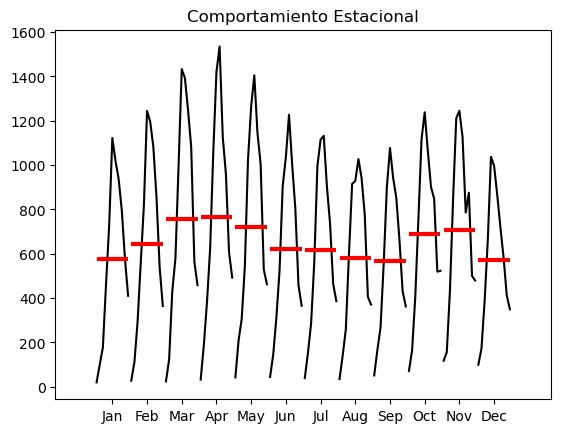

In [7]:
# Plot Quarterplot
ax = plt.gca()
sm.graphics.tsa.month_plot(stf_matlab,ax=ax)
ax.set_title('Comportamiento Estacional')

Meses marzo, abril, mayo y octubre y noviembre tienen mas valores comparando con otros periodos. Como sabemos que que esos periodos que los estudientes hacen mas tareas despues sus examenes, puede relacionar con eso.

In [8]:
# Log Transformer Function
from sktime.transformations.series.boxcox import LogTransformer

In [9]:
# Apply Log Transformer

transformer = LogTransformer()
log_stf_matlab = transformer.fit_transform(stf_matlab)
stf_matlab.tail()

2019-08-31    371
2019-09-30    362
2019-10-31    523
2019-11-30    479
2019-12-31    349
Name: matlab, dtype: int64

In [10]:
# Sktime fucntions
# Forecast horizon and Split functions 
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

120 12


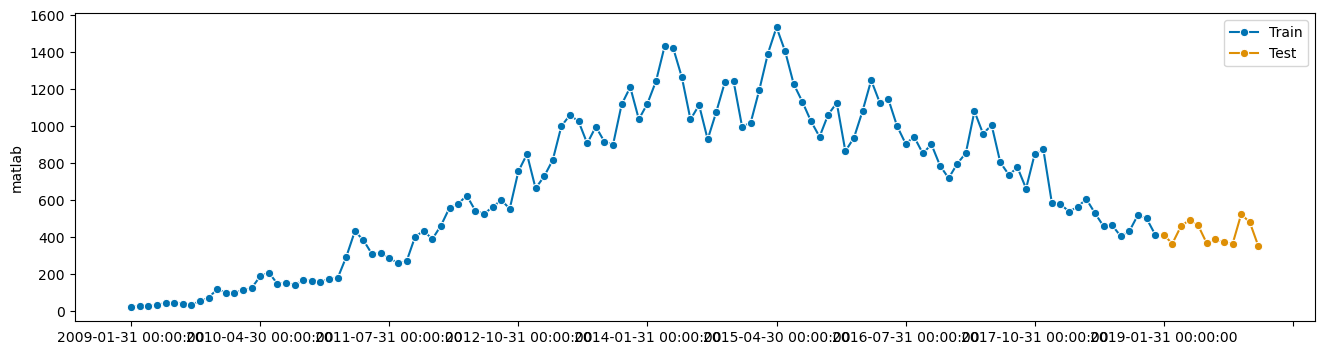

In [11]:
# Select Train & test sample
# we will try to forecast y_test from y_train
# plotting for illustration
# original and log samples
n_test=12
n_forecast=12
y_train, y_test = temporal_train_test_split(y =stf_matlab, test_size=12)
log_y_train, log_y_test = temporal_train_test_split(y =log_stf_matlab, test_size=n_test)
plot_series(y_train, y_test, labels=["Train", "Test"])
# Time Series Size
print(y_train.shape[0], y_test.shape[0])


# ETS MODELS

In [12]:
from sktime.forecasting.ets import AutoETS

In [13]:
# specifying forecasting horizon
fh = ForecastingHorizon((np.arange(len(y_test)) + 1), freq ='M', is_relative=True)


In [14]:
# specifying the forecasting algorithm
matlab_autoETS_model = AutoETS(auto=True, freq='M', sp=12, n_jobs=-1)

In [15]:
#  Auto ETS Model Estimation
matlab_autoETS_model.fit(y_train)

AutoETS(auto=True, freq='M', n_jobs=-1, sp=12)

In [16]:
#  Auto ETS Model Summary
print(matlab_autoETS_model.summary())

                                 ETS Results                                  
Dep. Variable:                 matlab   No. Observations:                  120
Model:                       ETS(MAM)   Log Likelihood                -659.367
Date:                Tue, 22 Nov 2022   AIC                           1354.735
Time:                        13:21:38   BIC                           1404.910
Sample:                    01-31-2009   HQIC                          1375.111
                         - 12-31-2018   Scale                            0.015
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.9999      0.098     10.245      0.000       0.809       1.191
smoothing_trend      9.999e-05        nan        nan        nan         nan         nan
smoothing_season

In [17]:
#  Auto ETS Forecasting
y_ETS_pred = matlab_autoETS_model.predict(fh)
print(y_ETS_pred)

2019-01-31    432.444067
2019-02-28    501.025593
2019-03-31    574.369228
2019-04-30    604.176852
2019-05-31    570.587743
2019-06-30    493.006717
2019-07-31    477.672071
2019-08-31    443.016954
2019-09-30    456.030582
2019-10-31    554.256738
2019-11-30    594.127001
2019-12-31    495.714978
Freq: M, dtype: float64


(<Figure size 1600x400 with 1 Axes>, <AxesSubplot:ylabel='matlab'>)

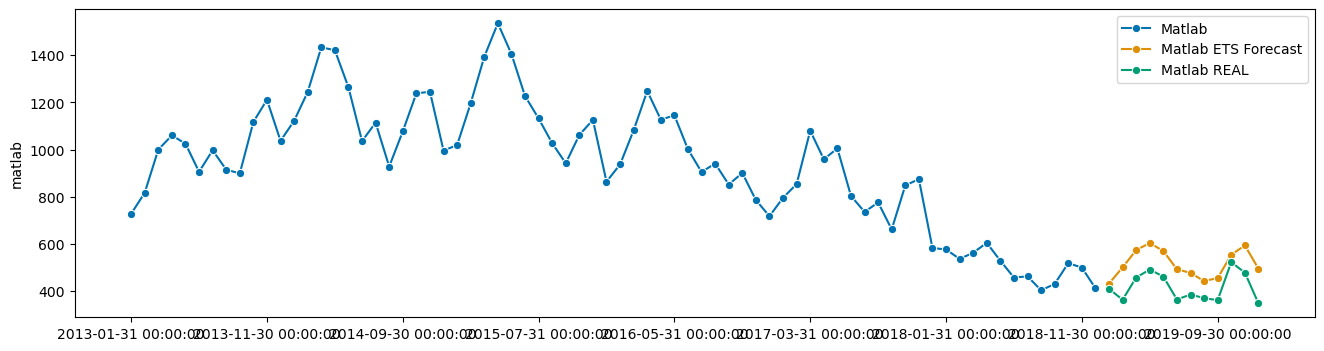

In [18]:
plot_series(y_train["2013":], y_ETS_pred,y_test, labels=["Matlab", "Matlab ETS Forecast", "Matlab REAL"])


# ayuda
# ap_autoETS_model._fitted_forecaster.fittedvalues.plot()
# ap_autoETS_model._fitted_forecaster.resid.plot()


# ARIMA

In [19]:
# AutoArima Function
from sktime.forecasting.arima import AutoARIMA

In [20]:
#  Auto ARIMA Model
forecaster = AutoARIMA(sp=12, suppress_warnings=True)

In [21]:
#  Auto ARIMA Model Estimation
forecaster.fit(log_y_train)

AutoARIMA(sp=12, suppress_warnings=True)

In [22]:
#  Auto ARIMA Model Summary
print(forecaster.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(4, 2, 1)x(1, 0, 1, 12)   Log Likelihood                  66.519
Date:                            Tue, 22 Nov 2022   AIC                           -117.038
Time:                                    13:23:23   BIC                            -94.873
Sample:                                01-31-2009   HQIC                          -108.038
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1645      0.091     -1.815      0.069      -0.342       0.013
ar.L2         -0.2499      0.079   

In [23]:
#  Auto ARIMA Forecast (log)
log_y_pred = forecaster.predict(fh)
log_y_pred

2019-01-31    5.986913
2019-02-28    6.016183
2019-03-31    6.094213
2019-04-30    6.069036
2019-05-31    5.991102
2019-06-30    5.823920
2019-07-31    5.750297
2019-08-31    5.653586
2019-09-30    5.603315
2019-10-31    5.708843
2019-11-30    5.681483
2019-12-31    5.463086
dtype: float64

In [24]:
#  Auto ARIMA Forecast (original)
y_ARIMA_pred=np.exp(log_y_pred)
y_ARIMA_pred

2019-01-31    398.183448
2019-02-28    410.010508
2019-03-31    443.284945
2019-04-30    432.263577
2019-05-31    399.855070
2019-06-30    338.295664
2019-07-31    314.283851
2019-08-31    285.312726
2019-09-30    271.324325
2019-10-31    301.521943
2019-11-30    293.384268
2019-12-31    235.824014
dtype: float64

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot:ylabel='matlab'>)

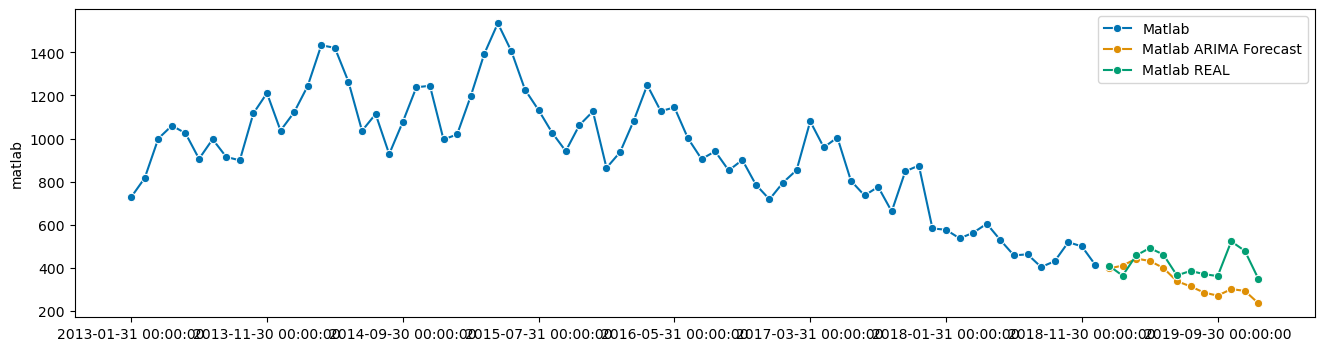

In [25]:
plot_series(y_train["2013":], y_ARIMA_pred,y_test, labels=["Matlab", "Matlab ARIMA Forecast", "Matlab REAL"])

In [26]:
from sktime.performance_metrics.forecasting import MeanSquaredError

In [27]:
# Forecast Accuracy
#Mean Squared Error
# ETS
rmse = MeanSquaredError(square_root=True)
rmse(y_test, y_ETS_pred)

/home/lapita/anaconda3/envs/timeseries/lib/python3.9/site-packages/sktime/performance_metrics/forecasting/_classes.py:422: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


104.78973614850679

In [28]:
# Forecast Accuracy
#Mean Squared Error
# ARIMA
rmse = MeanSquaredError(square_root=True)
rmse(y_test, y_ARIMA_pred)

######################
# Forecast 2021 & 2022
######################

/home/lapita/anaconda3/envs/timeseries/lib/python3.9/site-packages/sktime/performance_metrics/forecasting/_classes.py:422: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


103.13373641827529

In [29]:
# ETS Model
y_ETS_model = AutoETS(auto=True, sp=12, n_jobs=-1)
y_ETS_model.fit(y_train)
print(y_ETS_model.summary())

/home/lapita/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/lapita/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/lapita/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/lapita/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/lapita/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/b

                                 ETS Results                                  
Dep. Variable:                 matlab   No. Observations:                  120
Model:                       ETS(MAM)   Log Likelihood                -659.367
Date:                Tue, 22 Nov 2022   AIC                           1354.735
Time:                        13:23:26   BIC                           1404.910
Sample:                    01-31-2009   HQIC                          1375.111
                         - 12-31-2018   Scale                            0.015
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.9999      0.098     10.245      0.000       0.809       1.191
smoothing_trend      9.999e-05        nan        nan        nan         nan         nan
smoothing_season

In [30]:
# ETS Forescat
y_ETS_pred = y_ETS_model.predict(fh)
print(y_ETS_pred)

2019-01-31    432.444067
2019-02-28    501.025593
2019-03-31    574.369228
2019-04-30    604.176852
2019-05-31    570.587743
2019-06-30    493.006717
2019-07-31    477.672071
2019-08-31    443.016954
2019-09-30    456.030582
2019-10-31    554.256738
2019-11-30    594.127001
2019-12-31    495.714978
Freq: M, dtype: float64


In [31]:
# ETS Model

y_ETS_model = AutoETS(auto=True, sp=12, n_jobs=-1)
y_ETS_model.fit(y_train)
print(y_ETS_model.summary())

/home/lapita/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/lapita/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/lapita/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/lapita/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/lapita/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/b

                                 ETS Results                                  
Dep. Variable:                 matlab   No. Observations:                  120
Model:                       ETS(MAM)   Log Likelihood                -659.367
Date:                Tue, 22 Nov 2022   AIC                           1354.735
Time:                        13:23:28   BIC                           1404.910
Sample:                    01-31-2009   HQIC                          1375.111
                         - 12-31-2018   Scale                            0.015
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.9999      0.098     10.245      0.000       0.809       1.191
smoothing_trend      9.999e-05        nan        nan        nan         nan         nan
smoothing_season

In [32]:
# ETS Forescat
y_ETS_pred = y_ETS_model.predict(fh)
print(y_ETS_pred)

2019-01-31    432.444067
2019-02-28    501.025593
2019-03-31    574.369228
2019-04-30    604.176852
2019-05-31    570.587743
2019-06-30    493.006717
2019-07-31    477.672071
2019-08-31    443.016954
2019-09-30    456.030582
2019-10-31    554.256738
2019-11-30    594.127001
2019-12-31    495.714978
Freq: M, dtype: float64


Modelo FOURTHETA

In [31]:
from darts import TimeSeries
from darts.models import Theta, FourTheta
from darts.metrics import mape
from darts.datasets.dataset_loaders import DatasetLoaderCSV

In [32]:
stf_data = pd.read_csv('../time series/data/StackOverflow.csv', delimiter= ",")
stf_data['month'] = pd.date_range(start='2009-01-31', end='2019-12-31', freq='M')
stf_data['month'] = pd.to_datetime(stf_data['month'], format = "%Y/%m/%d",  yearfirst=True)

series = TimeSeries.from_dataframe(stf_data, "month", "matlab")
series

<TimeSeries (DataArray) (month: 132, component: 1, sample: 1)>
array([[[  19.]],

       [[  27.]],

       [[  24.]],

       [[  32.]],

       [[  42.]],

       [[  44.]],

       [[  39.]],

       [[  34.]],

       [[  51.]],

       [[  71.]],

...

       [[ 458.]],

       [[ 492.]],

       [[ 462.]],

       [[ 365.]],

       [[ 386.]],

       [[ 371.]],

       [[ 362.]],

       [[ 523.]],

       [[ 479.]],

       [[ 349.]]])
Coordinates:
  * month      (month) datetime64[ns] 2009-01-31 2009-02-28 ... 2019-12-31
  * component  (component) object 'matlab'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

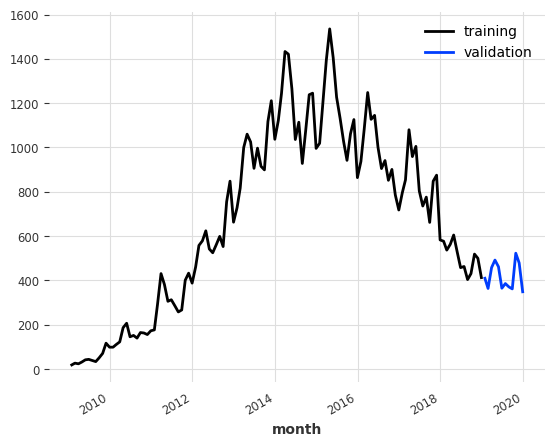

In [33]:
train, val = series[:-12], series[-12:]
train.plot(label="training")
val.plot(label="validation")

In [34]:
model =FourTheta(seasonality_period=12)
model.fit(train)
y_pred_4theta = model.predict(len(val))
print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, y_pred_4theta)))
y_pred_4theta


model 4Theta(theta:2, curve:TrendMode.LINEAR, model:ModelMode.ADDITIVE, seasonality:SeasonalityMode.MULTIPLICATIVE) obtains MAPE: 125.49%


<TimeSeries (DataArray) (month: 12, component: 1, sample: 1)>
array([[[ 130.83630334]],

       [[1193.60234704]],

       [[1096.7848155 ]],

       [[1096.94356732]],

       [[1027.05913527]],

       [[ 874.13823379]],

       [[ 842.53288892]],

       [[ 782.78292539]],

       [[ 794.23600318]],

       [[ 958.02691498]],

       [[1016.67329626]],

       [[ 842.97774267]]])
Coordinates:
  * month      (month) datetime64[ns] 2019-01-31 2019-02-28 ... 2019-12-31
  * component  (component) object 'matlab'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

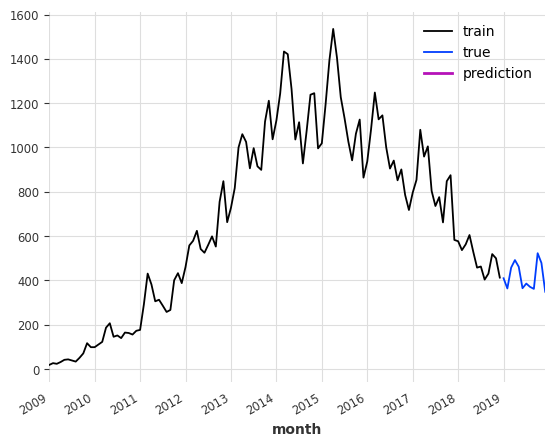

In [35]:
y_train.plot(label="train")
y_test.plot(label="true")
y_pred_4theta.plot(label="prediction")

In [36]:
from darts.utils.utils import SeasonalityMode, TrendMode, ModelMode
theta_grid = {
    #'theta':2- np.linspace(-10, 10, 10),
    'theta':[-4,-3,-2,-1,1,2,3,4],
    'model_mode': [ModelMode.ADDITIVE,ModelMode.ADDITIVE],
    'season_mode': [SeasonalityMode.MULTIPLICATIVE,SeasonalityMode.ADDITIVE],
    'trend_mode': [TrendMode.EXPONENTIAL,TrendMode.LINEAR]
}

best_grid_model=FourTheta.gridsearch(parameters=theta_grid,
                                series=series,
                                forecast_horizon= 12,
                                start=0.5,
                                last_points_only=False,
                                metric=mape,
                                reduction=np.mean,
                                verbose=False,
                                n_jobs=-1)

best_grid_model

/home/lapita/anaconda3/envs/timeseries/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


(<darts.models.forecasting.theta.FourTheta at 0x7f5386146f40>,
 {'theta': 1,
  'model_mode': <ModelMode.ADDITIVE: 'additive'>,
  'season_mode': <SeasonalityMode.ADDITIVE: 'additive'>,
  'trend_mode': <TrendMode.EXPONENTIAL: 'exponential'>},
 23.026167702147593)

Model mutiplicativo nos da error. Elegimos additive, additive

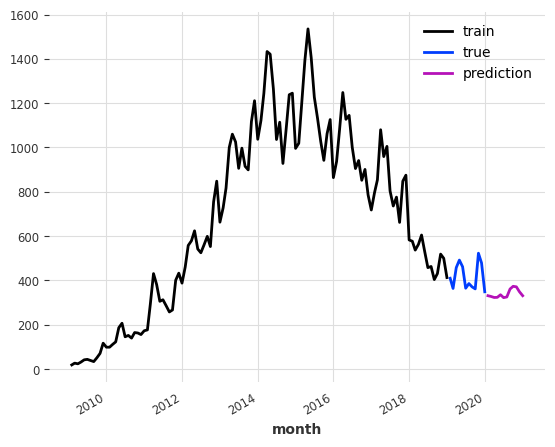

In [37]:
model_4theta =FourTheta(theta=best_grid_model[1]['theta'],
                 model_mode=ModelMode.ADDITIVE,
                 season_mode=SeasonalityMode.ADDITIVE,
                 trend_mode=TrendMode.LINEAR
                 )
model_4theta.fit(series)
forecast = model_4theta.predict(len(val))

train.plot(label="train")
val.plot(label="true")
forecast.plot(label="prediction")

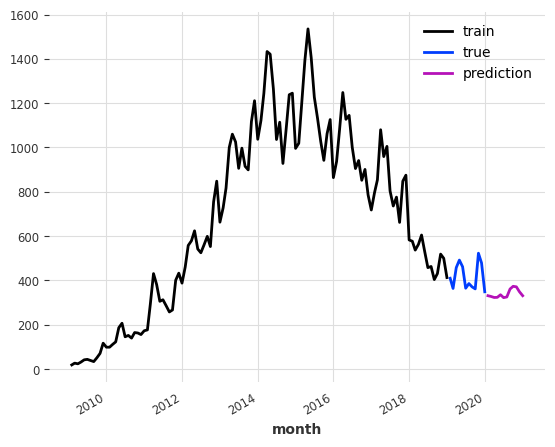

In [38]:
train.plot(label="train")
val.plot(label="true")
forecast.plot(label="prediction")

In [39]:
# %%
# Search for the best theta parameter, by trying 50 different values
thetas = 2- np.linspace(-10, 10, 50)

best_mape = float("inf")
best_theta = 0




for theta in thetas:

    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta


In [40]:
best_theta

0.5714285714285712

In [41]:
thetas


array([12.        , 11.59183673, 11.18367347, 10.7755102 , 10.36734694,
        9.95918367,  9.55102041,  9.14285714,  8.73469388,  8.32653061,
        7.91836735,  7.51020408,  7.10204082,  6.69387755,  6.28571429,
        5.87755102,  5.46938776,  5.06122449,  4.65306122,  4.24489796,
        3.83673469,  3.42857143,  3.02040816,  2.6122449 ,  2.20408163,
        1.79591837,  1.3877551 ,  0.97959184,  0.57142857,  0.16326531,
       -0.24489796, -0.65306122, -1.06122449, -1.46938776, -1.87755102,
       -2.28571429, -2.69387755, -3.10204082, -3.51020408, -3.91836735,
       -4.32653061, -4.73469388, -5.14285714, -5.55102041, -5.95918367,
       -6.36734694, -6.7755102 , -7.18367347, -7.59183673, -8.        ])

In [42]:
best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print(
    "The MAPE is: {:.2f}, with theta = {}.".format(
        mape(val, pred_best_theta), best_theta
    )
)

The MAPE is: 46.64, with theta = 0.5714285714285712.


El mejor Theta nos reduce el MAPE hasta a 46.64%

In [43]:
average_error = best_theta_model.backtest(
    series,
    start=0.4,
    forecast_horizon=12,
    metric=mape,
    reduction=np.mean,  # this is actually the default
    verbose=True,
)

print("Average error (MAPE) over all historical forecasts: %.2f" % average_error)

  0%|          | 0/69 [00:00<?, ?it/s]

Average error (MAPE) over all historical forecasts: 33.86


Modelo TBATS

In [34]:
from darts.models import TBATS
from darts.metrics import mape

In [36]:
model_tbats =TBATS(
use_box_cox=None,
box_cox_bounds=(0, 1),
use_trend=None,
use_damped_trend=None,
seasonal_periods="freq",
use_arma_errors=True,
show_warnings=False,
multiprocessing_start_method='spawn',
random_state=0)
model_tbats.fit(train)
y_pred_tbats = model_tbats.predict(len(val))
print("model {} obtains MAPE: {:.2f}%".format(model_tbats, mape(val, y_pred_tbats)))

NameError: name 'train' is not defined

In [54]:
model_tbats.model.params.summary()

'Use Box-Cox: True\nUse trend: True\nUse damped trend: False\nSeasonal periods: [12.]\nSeasonal harmonics [4]\nARMA errors (p, q): (0, 0)\nBox-Cox Lambda 0.418009\nSmoothing (Alpha): 0.733269\nTrend (Beta): 0.047362\nDamping Parameter (Phi): 1.000000\nSeasonal Parameters (Gamma): [-0.00644706  0.01084963]\nAR coefficients []\nMA coefficients []\nSeed vector [ 4.13400381  0.95888656  0.4094223  -1.4376352  -0.69208525  0.23254398\n  1.37850692 -0.1863394   0.25207584  0.45776594]\n'

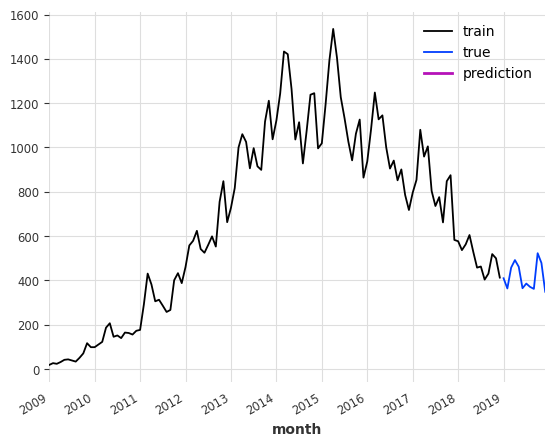

In [55]:
# %%
y_train.plot(label="train")
y_test.plot(label="true")
y_pred_tbats.plot(label="prediction")

Cross validation Historical

In [33]:
historical_fcast_tbats = model_tbats.historical_forecasts(
    series, start=0.4, forecast_horizon=12, verbose=True, stride=1
)

series.plot(label="data")
historical_fcast_tbats.plot(label="backtest 12-months ahead forecast (Tbats)")
print("MAPE = {:.2f}%".format(mape(historical_fcast_tbats, series)))

NameError: name 'model_tbats' is not defined

In [ ]:
model_best =TBATS(
use_box_cox=True,
box_cox_bounds=(0, 0),
use_trend=True,
use_damped_trend=False,
seasonal_periods="freq",
use_arma_errors=False,
show_warnings=False,
multiprocessing_start_method='spawn',
random_state=0)

In [45]:
historical_fcast_tbats = model_best.historical_forecasts(
    series, start=0.4, forecast_horizon=12, verbose=True, stride=1
)

series.plot(label="data")
historical_fcast_tbats.plot(label="backtest 12-months ahead forecast (Tbats)")
print("MAPE = {:.2f}%".format(mape(historical_fcast_tbats, series)))


NameError: name 'model_best' is not defined

In [44]:
print("MAPE = {:.2f}%".format(mape(historical_fcast_tbats, series)))

NameError: name 'historical_fcast_tbats' is not defined

In [29]:
# Sktime fucntions
# Forecast Accuracy MAPE & MSE & RMSE
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError

In [30]:
# Forecast Accuracy
# MAPE
# ETS
mean_absolute_percentage_error(y_test, y_pred_ETS)

NameError: name 'y_ETS_pred' is not defined

In [41]:
# Forecast Accuracy
# MAPE
# ARIMA
mean_absolute_percentage_error(y_test, y_pred_ARIMA)

0.13969632257916523

In [3]:
prediccion2= y_pred_4theta.concatenate(y_pred_tbats, axis=1, ignore_time_axis=True, ignore_static_covariates=False, drop_hierarchy=True)

NameError: name 'y_pred_4theta' is not defined

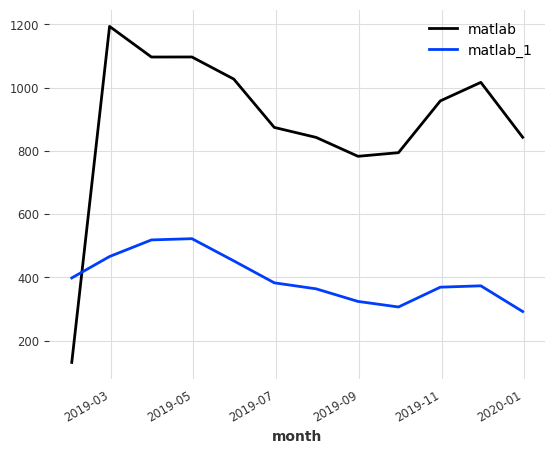

In [72]:
prediccion2.plot()